In [ ]:
# restart kernel if conda install required for any packages

In [1]:
!conda install git matplotlib -y

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



## Package Plan ##

  environment location: /opt/conda/envs/pycaret_full

  added / updated specs:
    - git
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  openssl                                  3.3.1-h4ab18f5_1 --> 3.3.1-h4bc722e_2 



                                     

In [2]:
# remove prior run checkpoints and logs

!rm -r .ipynb_checkpoints
!rm logs.log

In [3]:
# import required python packages

import multiprocessing, time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import data_util

from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

# 3.2 Dataset

**3.2.1 Published Source**

Ferrag et al. published research titled 'Edge-IIoTset: A New Comprehensive Realistic Cyber Security Dataset of IoT and IIoT Applications for Centralized and
Federated Learning'. This research effort developed a testbed for IoT and IIoT cyber research. 

The testbed is organized into seven layers: 
* 1. Cloud Computing Layer
* 2. Network Functions Virtualization Layer
* 3. Blockchain Network Layer
* 4. Fog Computing Layer
* 5. Software-Defined Networking Layer
* 6. Edge Computing Layer
* 7. IoT and IIoT Perception Layer. Emerging technologies of IoT and IIoT applications such as ThingsBoard IoT platform, Digital twin, and Mosquitto MQTT brokers were provided.

The dataset titled 'Edge-IIoTset' was produced from the author's testbed to represent IoT/IIoT network traffic from various types of devices. The devices include: temperature and humidity sensor, ultrasonic sensor, water level detection sensor, pH sensor meter, soil moisture sensor, heart rate sensor, and flame sensor. 



**3.2.2 Dataset Structure**


The authors extracted features obtained from the dataset sources including: alerts, system resources, logs, network traffic, using two networks protocol analyzers ( namely the Zeek tool and TShark tool). 

63 features were finally selected from the nearly 1,200 features obtained in the raw testbed data. The features and descriptions provided in the author's publication is listed below:

Step 1: 

Obtain and preview dataset

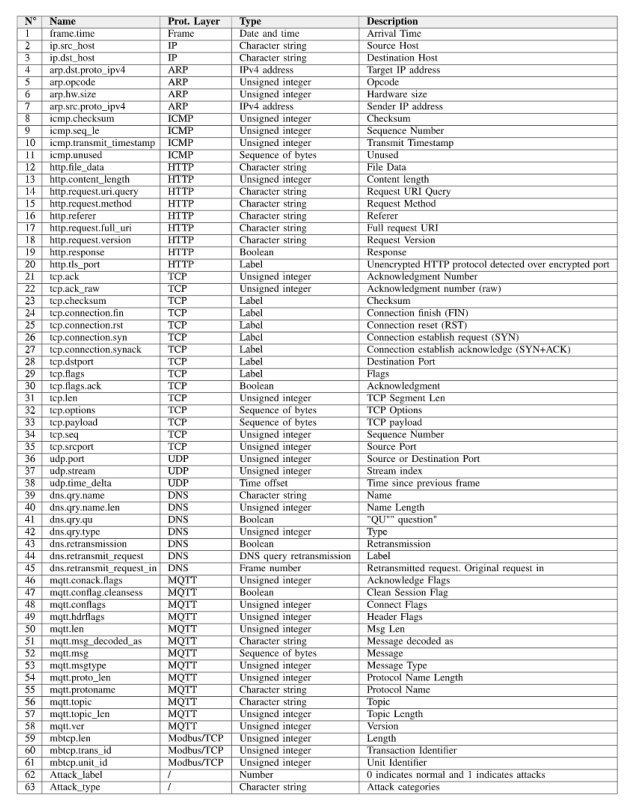

In [4]:
# Display the DataDescriptions.png file in the current directory

img = mpimg.imread('DataDescriptions.png')
imgplot = plt.imshow(img)
plt.axis('off')

# Display the image at size 8x12
fig = plt.gcf()
fig.set_size_inches(8, 12)
plt.show()

In [5]:
# Read the DNN-EdgeIIoT-dataset.csv file into a dataframe

Published_Data = pd.read_csv('DNN-EdgeIIoT-dataset.csv')
Published_Data.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [6]:
# show the number of rows and columns/features in the dataset

Published_Data.shape

(2219201, 63)

**3.2.3 Univariate Examination**

Step 2: 

A review of the 63 individual data features is completed here to understand each feature, the definition of abbreviations and notations, what the features represent, and the units used to display the data.

In [7]:
# show feature names that have 4 or less unique values,

for column in Published_Data.columns:
    if Published_Data[column].nunique() <= 4:
        print(column, Published_Data[column].unique())

arp.opcode [0. 1. 2.]
arp.hw.size [0. 6.]
icmp.unused [0.]
http.response [0. 1.]
http.tls_port [0.]
tcp.connection.fin [0. 1.]
tcp.connection.rst [0. 1.]
tcp.connection.syn [0. 1.]
tcp.connection.synack [1. 0.]
tcp.flags.ack [1. 0.]
dns.qry.type [0.]
dns.retransmission [ 0.  1. 28. 12.]
dns.retransmit_request [0. 1.]
dns.retransmit_request_in [0. 1.]
mqtt.conflag.cleansess [0. 1.]
mqtt.conflags [0. 2.]
mqtt.len [ 0. 12.  2. 39.]
mqtt.msg_decoded_as [0.]
mqtt.proto_len [0. 4.]
mqtt.protoname ['0' 'MQTT' '0.0' 0.0]
mqtt.topic ['0' 'Temperature_and_Humidity' '0.0' 0.0]
mqtt.topic_len [ 0. 24.]
mqtt.ver [0. 4.]
Attack_label [0 1]


In [8]:
# show the data type of the feature 'dns.qry.name'

print("Data type of feature 'dns.qry.name': " + str(Published_Data['dns.qry.name'].dtype))

Data type of feature 'dns.qry.name': float64


In [11]:
# show the unique values for dns.qry.name and dns.qry.name.len

print("Distinct values of feature 'dns.qry.name.len': \n\n" , Published_Data['dns.qry.name.len'].unique())

Distinct values of feature 'dns.qry.name.len': 

 [0 '0' '0.debian.pool.ntp.org' '1.debian.pool.ntp.org'
 '2.debian.pool.ntp.org' '3.debian.pool.ntp.org' '_googlecast._tcp.local'
 'raspberrypi.local' 'null-null.local' '0.0' '1.0']


In [12]:
# show the features that have 0 values in all instances. The zeros can be integers, floats, or strings.

for column in Published_Data.columns:
    if Published_Data[column].eq(0).all():
        print(column)

icmp.unused
http.tls_port
dns.qry.type
mqtt.msg_decoded_as


In [13]:
# find features that all contain a combination of zeros as integers, floats, and objects

columns_with_zeros_int = Published_Data.select_dtypes(include=['int64']).columns[(Published_Data.select_dtypes(include=['int64']) == 0).any()]
columns_with_zeros_float = Published_Data.select_dtypes(include=['float64']).columns[(Published_Data.select_dtypes(include=['float64']) == 0).any()]
columns_with_zeros_str = Published_Data.select_dtypes(include=['object']).columns[(Published_Data.select_dtypes(include=['object']) == '0').any()]

columns_with_zeros = columns_with_zeros_int.union(columns_with_zeros_float).union(columns_with_zeros_str)
display(columns_with_zeros)
display(len(columns_with_zeros))

Index(['Attack_label', 'arp.dst.proto_ipv4', 'arp.hw.size', 'arp.opcode',
       'arp.src.proto_ipv4', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'http.content_length', 'http.file_data',
       'http.referer', 'http.request.full_uri', 'http.request.method',
       'http.request.uri.query', 'http.request.version', 'http.response',
       'http.tls_port', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'icmp.unused', 'ip.dst_host', 'ip.src_host',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msg', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn

61

List of univariate insights identified

* Mixed data type warnings are returned for 17 features when the published dataset is red into a dataframe. 

* frame.time: missing month and day in the timestamp, instances have ip addresses in this field

* four features only have 0 values in all instances: 

* Features with 4 or less distinct values (showing here examples of mixed data types): 

* Features with high % of zero values

* Features with high skewness

* Features with high imbalance

* Features with values that don't match the description

* Features contain 0 value integers, 0.0 value floats, and '0' value strings:




# 3.3 Data Analysis Methods


**3.3.1 Processing**

Step 3:

Data Cleansing

- Fix mixed data types
- Replace floats and ints in string columns
- Remove strings from float and int columns
- Convert ints to floats
- Remove columns that are all zeros
- Fix column names that are wrong (dns query name vs len)






In [14]:
# find the features that have mixed data types

mixed_data_types = Published_Data.columns[Published_Data.apply(lambda x: x.apply(type).nunique() > 1)]

display(mixed_data_types)

Index(['ip.dst_host', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4',
       'http.file_data', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'dns.qry.name.len',
       'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic'],
      dtype='object')

In [15]:
# find all the features that have object data type

object_features = Published_Data.select_dtypes(include=['object']).columns

display(object_features)

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'tcp.options', 'tcp.payload', 'tcp.srcport',
       'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname',
       'mqtt.topic', 'Attack_type'],
      dtype='object')

In [16]:
# show distinct values for http.request.version

print("Distinct values of feature 'http.request.version': \n\n" , Published_Data['http.request.version'].unique())

Distinct values of feature 'http.request.version': 

 [0.0 '0.0' '0' 'HTTP/1.1' 'HTTP/1.0'
 "name=a><input name=i value=XSS>&lt;script>alert('Vulnerable')</script> HTTP/1.1"
 'Src=javascript:alert(\'Vulnerable\')><Img Src=\\" HTTP/1.1' '> HTTP/1.1'
 'script>alert(1)/script><\\" HTTP/1.1'
 '-al&_PHPLIB[libdir]=http://cirt.net/rfiinc.txt?? HTTP/1.1' '-a HTTP/1.1'
 '/etc/passwd|?data=Download HTTP/1.1'
 '-al&ABSOLUTE_PATH_STUDIP=http://cirt.net/rfiinc.txt?? HTTP/1.1'
 'By Dr HTTP/1.1']


In [17]:
# convert object data type features to string data type

Cleaned_Data = Published_Data.copy()

Cleaned_Data = Cleaned_Data.astype({'frame.time': 'string',
                                    'ip.src_host': 'string', 
                                    'arp.dst.proto_ipv4': 'string',
                                    'arp.src.proto_ipv4': 'string',
                                    'http.file_data': 'string',
                                    'http.request.uri.query': 'string', 'http.request.method': 'string', 
                                    'http.referer': 'string',
                                    'http.request.full_uri': 'string',
                                    'http.request.version': 'string',
                                    'tcp.options': 'string',
                                    'ip.dst_host': 'string',
                                    'tcp.payload': 'string',
                                    'mqtt.msg': 'string',
                                    'mqtt.protoname': 'string',
                                    'mqtt.topic': 'string',
                                    'mqtt.conack.flags': 'string',
                                    'tcp.srcport': 'string',
                                    'Attack_type': 'string'})

In [18]:
# show the data types of all features, don't truncate the output

pd.set_option('display.max_rows', None)
display(Cleaned_Data.dtypes)

frame.time                    string
ip.src_host                   string
ip.dst_host                   string
arp.dst.proto_ipv4            string
arp.opcode                   float64
arp.hw.size                  float64
arp.src.proto_ipv4            string
icmp.checksum                float64
icmp.seq_le                  float64
icmp.transmit_timestamp      float64
icmp.unused                  float64
http.file_data                string
http.content_length          float64
http.request.uri.query        string
http.request.method           string
http.referer                  string
http.request.full_uri         string
http.request.version          string
http.response                float64
http.tls_port                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
t

In [19]:
# list the remaining features that have object data type

remaining_object_features = Cleaned_Data.select_dtypes(include=['object']).columns

display(remaining_object_features)

Index(['dns.qry.name.len'], dtype='object')

In [20]:
# display the values in frame.time that do not contain a colon

frame_time_errors = Cleaned_Data[~Cleaned_Data['frame.time'].str.contains(':')]

frame_time_errors.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
1615643,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1615644,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1615645,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1615646,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1615647,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [22]:
# show a preview of the cleaned dataset

Cleaned_Data.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [23]:
# dns.qry.name and dns.qry.name.len are transposed
# create a new feature dns.qry.name.len.fixed that contains the values in dns.qry.name, as dtype float64
# create a new feature dns.qry.name.fixed that contains the values in dns.qry.name.len, as dtype string

Cleaned_Data['dns.qry.name.len.fixed'] = Cleaned_Data['dns.qry.name']
Cleaned_Data['dns.qry.name.fixed'] = Cleaned_Data['dns.qry.name.len'].astype('string')

# show the data types of dns.qry.name.len.fixed and dns.qry.name.fixed

display(Cleaned_Data[['dns.qry.name.len.fixed', 'dns.qry.name.fixed']].dtypes)

dns.qry.name.len.fixed    float64
dns.qry.name.fixed         string
dtype: object

In [24]:
# again, show feature names that have 2 or less unique values,

low_distinct_values = []

for column in Cleaned_Data.columns:
    if Cleaned_Data[column].nunique() < 2:
        print(column, Cleaned_Data[column].unique())
        if column != 'Attack_label' and column != 'Attack_type':
            low_distinct_values.append(column)

icmp.unused [0.]
http.tls_port [0.]
dns.qry.type [0.]
mqtt.msg_decoded_as [0.]


Features with known issues thus far:

* frame.time (has errors)
* dns.qry.name (replaced)
* dns.qry.name.len (replaced)
* icmp.unused (all zeros)
* http.tls_port (all zeros)
* dns.qry.type (all zeros)
* mqtt.msg_decoded_as (all zeros)
* ip.src_host (biased)
* ip.dst_host (biased)
* arp.dst.proto_ipv4 (biased)
* arp.src.proto_ipv4 (biased)
* Attack_type (multi class label not used)

In [26]:
# concatenate the list of features with known issues

erroneous_features = ['frame.time',
                        'dns.qry.name',
                        'dns.qry.name.len',
                        'icmp.unused',
                        'http.tls_port',
                        'dns.qry.type',
                        'http.request.version',
                        'mqtt.msg_decoded_as',
                        'ip.src_host',
                        'ip.dst_host',
                        'arp.dst.proto_ipv4',
                        'arp.src.proto_ipv4']

for item in low_distinct_values:
    erroneous_features.append(item)


display(erroneous_features)

['frame.time',
 'dns.qry.name',
 'dns.qry.name.len',
 'icmp.unused',
 'http.tls_port',
 'dns.qry.type',
 'http.request.version',
 'mqtt.msg_decoded_as',
 'ip.src_host',
 'ip.dst_host',
 'arp.dst.proto_ipv4',
 'arp.src.proto_ipv4',
 'icmp.unused',
 'http.tls_port',
 'dns.qry.type',
 'mqtt.msg_decoded_as']

In [29]:
# drop the erroneous features from the dataset 

Cleaned_Data = Cleaned_Data.drop(columns=erroneous_features)

# show the shape of the cleaned dataset

# show the columns of the cleaned dataset
display(Cleaned_Data.columns)

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'http.file_data', 'http.content_length',
       'http.request.uri.query', 'http.request.method', 'http.referer',
       'http.request.full_uri', 'http.response', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload',
       'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta',
       'dns.qry.qu', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname',
       'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len',
       'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label', 'Attack_type',
      

In [30]:
# show cleaned data shape

Cleaned_Data.shape

(2219201, 53)

In [31]:
# count unique values in categorical columns

categorical_features = Cleaned_Data.select_dtypes(include='string')
count_categorical_unique = categorical_features.nunique()
display(count_categorical_unique)

http.file_data              2396
http.request.uri.query      5526
http.request.method            9
http.referer                   5
http.request.full_uri      11408
tcp.options               242565
tcp.payload               274925
tcp.srcport                61975
mqtt.conack.flags             13
mqtt.msg                     136
mqtt.protoname                 3
mqtt.topic                     3
Attack_type                   15
dns.qry.name.fixed            10
dtype: int64

In [ ]:
# evaluate distribution of values in categorical features before encoding

for feature in categorical_features.columns:
    print(f"Top 5 values for {feature}")
    top_values = categorical_features[feature].value_counts().head(5)
    print(top_values)
    print("\n")


Top 5 values for http.file_data
0.0                                                  2053112
0                                                     121692
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//...      20693
method=open+service%3a3%2e0%2e2%2e1105&service...       8818
<!--#include virtual="/index.jsp"-->                    5999
Name: http.file_data, dtype: Int64


Top 5 values for http.request.uri.query
0.0                                                  2117888
0                                                      87233
path_prefix=http://cirt.net/rfiinc.txt?                  343
Command=GetFolders&Type=File&CurrentFolder=%2F           218
mosConfig_absolute_path=http://cirt.net/rfiinc...        176
Name: http.request.uri.query, dtype: Int64


Top 5 values for http.request.method
0.0      1977717
0         209397
GET        30474
POST        1212
TRACE        387
Name: http.request.method, dtype: Int64


Top 5 values for http.referer
0.0                                       

In [ ]:
# addition features that can't be encoded

additional_errors = ['http.file_data',
                    'http.request.uri.query',
                    'http.request.full_uri',
                    'tcp.options',
                    'tcp.payload',
                    'tcp.srcport',
                    'mqtt.msg',
                    ]

In [ ]:
# drop additional error features that can not be encoded

Cleaned_Data = Cleaned_Data.drop(columns=additional_errors)

# show the columns of the cleaned dataset
display(Cleaned_Data.columns)

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'http.content_length', 'http.request.method',
       'http.referer', 'http.response', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port',
       'udp.stream', 'udp.time_delta', 'dns.qry.qu', 'dns.retransmission',
       'dns.retransmit_request', 'dns.retransmit_request_in',
       'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type', 'dns.qry.name.len.fixed', 'dns.qry.name.fixed'],
      dtype='object')

In [35]:
# show updated cleaned data shape

Cleaned_Data.shape

(2219201, 46)

In [ ]:
# count unique values in categorical columns that will be encoded

categorical_features = Cleaned_Data.select_dtypes(include='string')
count_categorical_unique = categorical_features.nunique()
display(count_categorical_unique)

http.request.method     9
http.referer            5
mqtt.conack.flags      13
mqtt.protoname          3
mqtt.topic              3
Attack_type            15
dns.qry.name.fixed     10
dtype: int64

Step 4:

Feature encoding
- transform categorical features into numeric values before training a model

In [37]:
# encode categorical features using one hot encoding for features with less than 15 unique vales
# set param for ML pipeline setup

max_encoding_ohe = 15

Step 5:

Evaluate target imbalance
- target class balance/imbalance and selection


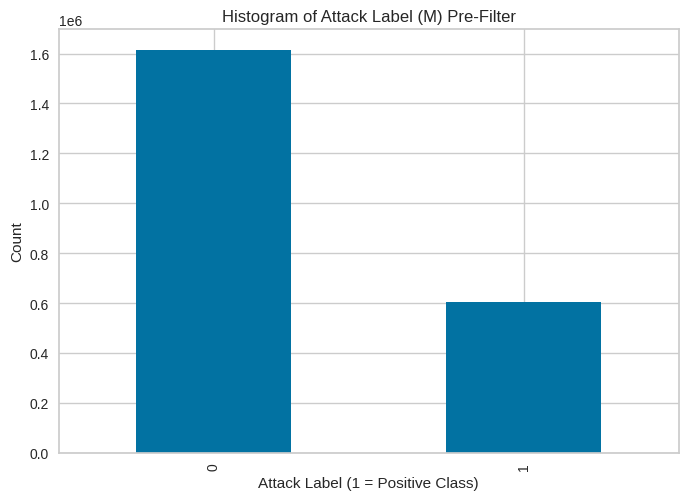

In [38]:
# balance of attack_label pre filter

Cleaned_Data['Attack_label'].value_counts().plot(kind='bar')
plt.title('Histogram of Attack Label (M) Pre-Filter')
plt.xlabel('Attack Label (1 = Positive Class)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

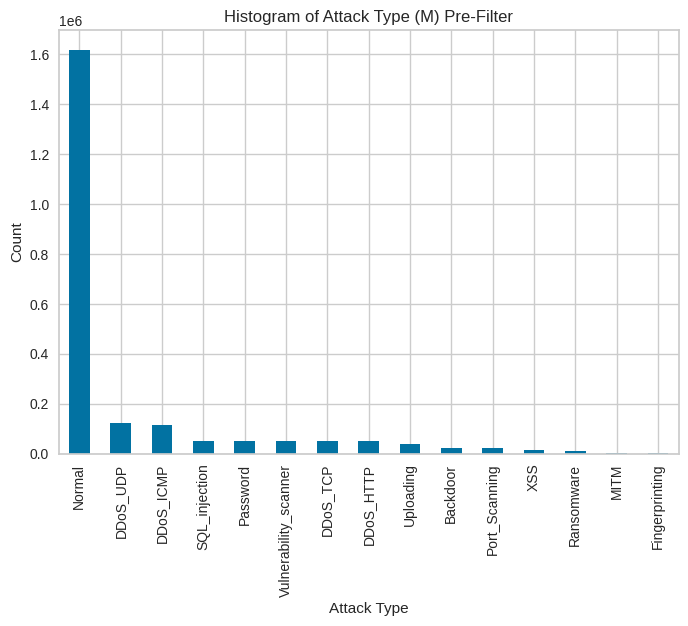

In [39]:
# target of attack_type feature

Cleaned_Data['Attack_type'].value_counts().plot(kind='bar')
plt.title('Histogram of Attack Type (M) Pre-Filter')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Create new dataframe filtered with only DDoS attack instances and normal traffic

Filtered_Data = Cleaned_Data[Cleaned_Data['Attack_type'].str.contains('DDoS') | Cleaned_Data['Attack_type'].str.contains('Normal')]
Filtered_Data['Attack_type'].value_counts()

Normal       1615643
DDoS_UDP      121568
DDoS_ICMP     116436
DDoS_TCP       50062
DDoS_HTTP      49911
Name: Attack_type, dtype: Int64

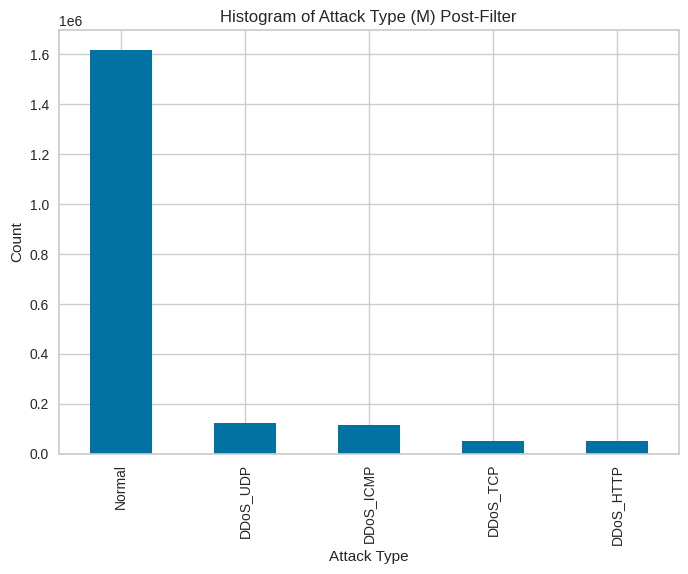

In [41]:
# target of attack_type feature after filter

Filtered_Data['Attack_type'].value_counts().plot(kind='bar')
plt.title('Histogram of Attack Type (M) Post-Filter')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

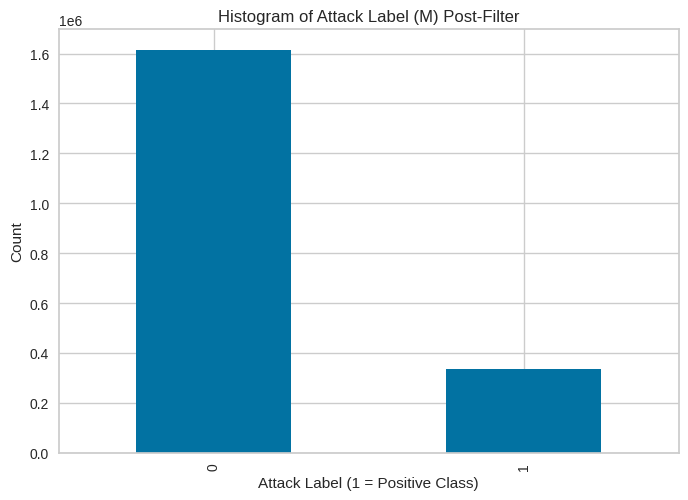

In [ ]:
# balance of attack_label post filter

Filtered_Data['Attack_label'].value_counts().plot(kind='bar')
plt.title('Histogram of Attack Label (M) Post-Filter')
plt.xlabel('Attack Label (1 = Positive Class)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [43]:
# initialize binary classification use case and drop multi class attack_type while preserving attack_label

Filtered_Data = Filtered_Data.drop(columns=['Attack_type'])

# show the columns of the filtered dataset

display(Filtered_Data.columns)

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'http.content_length', 'http.request.method',
       'http.referer', 'http.response', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport',
       'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port',
       'udp.stream', 'udp.time_delta', 'dns.qry.qu', 'dns.retransmission',
       'dns.retransmit_request', 'dns.retransmit_request_in',
       'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'dns.qry.name.len.fixed', 'dns.qry.name.fixed'],
      dtype='object')

**3.3.2 Descriptive Analysis**








Step 6:

Scale and Transform
- normalization: rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information
- use zscore: standard zscore is calculated as z = (x – u) / s

In [44]:
# set params for ML pipeline setup

normalize_method = 'zscore'

Step 7:

Feature Selection

- Multivariate examination to address multicollinearity
    - drop features that are highly correlated with another feature or with the dependent variable
    - Minimum absolute Pearson correlation to identify correlated features set to 0.9 removes highly correlated features
    
- Ignore Low Variance
    - keep all features with non-zero variance to remove the features that have the same value in all instances


In [ ]:
# set params for ML pipeline setup

remove_multicollinearity = True
multicollinearity_threshold = 0.9

In [ ]:
# set param for features to ignore

ignore_features = ['mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic', 'dns.qry.name.fixed', 'tcp.dstport']

In [47]:
# show the data types of all features

display(Filtered_Data.dtypes)

arp.opcode                   float64
arp.hw.size                  float64
icmp.checksum                float64
icmp.seq_le                  float64
icmp.transmit_timestamp      float64
http.content_length          float64
http.request.method           string
http.referer                  string
http.response                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
tcp.dstport                  float64
tcp.flags                    float64
tcp.flags.ack                float64
tcp.len                      float64
tcp.seq                      float64
udp.port                     float64
udp.stream                   float64
udp.time_delta               float64
dns.qry.qu                   float64
dns.retransmission           float64
dns.retransmit_request       float64
d

Check the memory usage of each feature

In [48]:
for column in Filtered_Data.columns:
    print(f"{column}: {Filtered_Data[column].memory_usage(deep=True)}")

arp.opcode: 31257920
arp.hw.size: 31257920
icmp.checksum: 31257920
icmp.seq_le: 31257920
icmp.transmit_timestamp: 31257920
http.content_length: 31257920
http.request.method: 132773226
http.referer: 132780664
http.response: 31257920
tcp.ack: 31257920
tcp.ack_raw: 31257920
tcp.checksum: 31257920
tcp.connection.fin: 31257920
tcp.connection.rst: 31257920
tcp.connection.syn: 31257920
tcp.connection.synack: 31257920
tcp.dstport: 31257920
tcp.flags: 31257920
tcp.flags.ack: 31257920
tcp.len: 31257920
tcp.seq: 31257920
udp.port: 31257920
udp.stream: 31257920
udp.time_delta: 31257920
dns.qry.qu: 31257920
dns.retransmission: 31257920
dns.retransmit_request: 31257920
dns.retransmit_request_in: 31257920
mqtt.conack.flags: 130362267
mqtt.conflag.cleansess: 31257920
mqtt.conflags: 31257920
mqtt.hdrflags: 31257920
mqtt.len: 31257920
mqtt.msgtype: 31257920
mqtt.proto_len: 31257920
mqtt.protoname: 129863979
mqtt.topic: 131524242
mqtt.topic_len: 31257920
mqtt.ver: 31257920
mbtcp.len: 31257920
mbtcp.trans

Check for duplicate records

In [49]:
Filtered_Data.duplicated().sum()

265311

In [50]:
Filtered_Data.drop_duplicates(inplace=True)

Step 8:

Check the range of each feature to mitigate impact of limitations of FHE SDK

Concrete ML default quantization parameters accept a range of 1-15

In [51]:
for column in Filtered_Data.columns:
    print(f"{column}: {Filtered_Data[column].nunique()}")

arp.opcode: 3
arp.hw.size: 2
icmp.checksum: 54576
icmp.seq_le: 56328
icmp.transmit_timestamp: 1
http.content_length: 3
http.request.method: 3
http.referer: 3
http.response: 2
tcp.ack: 114203
tcp.ack_raw: 736849
tcp.checksum: 65536
tcp.connection.fin: 2
tcp.connection.rst: 2
tcp.connection.syn: 2
tcp.connection.synack: 2
tcp.dstport: 31629
tcp.flags: 9
tcp.flags.ack: 2
tcp.len: 1442
tcp.seq: 189964
udp.port: 437
udp.stream: 120450
udp.time_delta: 440
dns.qry.qu: 5
dns.retransmission: 4
dns.retransmit_request: 2
dns.retransmit_request_in: 2
mqtt.conack.flags: 13
mqtt.conflag.cleansess: 2
mqtt.conflags: 2
mqtt.hdrflags: 5
mqtt.len: 4
mqtt.msgtype: 5
mqtt.proto_len: 2
mqtt.protoname: 3
mqtt.topic: 3
mqtt.topic_len: 2
mqtt.ver: 2
mbtcp.len: 8
mbtcp.trans_id: 151
mbtcp.unit_id: 6
Attack_label: 2
dns.qry.name.len.fixed: 12449
dns.qry.name.fixed: 9


# 3.4 Model Development

**3.4.1 Initialize Pipeline**

In [ ]:
# Complete ML pipeline setup with params defined above and here

try:
    ML_Pipeline = setup(data=Filtered_Data,
                        target='Attack_label',
                        max_encoding_ohe = max_encoding_ohe,
                        normalize = True,
                        normalize_method = normalize_method,
                        remove_multicollinearity = remove_multicollinearity,
                        multicollinearity_threshold = multicollinearity_threshold,
                        ignore_features = ignore_features,
                        train_size = 0.7, #70/30 train test split
                        data_split_shuffle = True,
                        data_split_stratify = True,
                        fold_strategy = 'stratifiedkfold',
                        fold = 3,
                        use_gpu = True,
                        verbose = True,
                        preprocess = True,
                        system_log = True,
                        memory = True,
                        experiment_name = 'praxis_experiment',
                        categorical_features = ['http.request.method',
                                                'http.referer'],
                        )
except Exception as e:
    print(e)

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,3033
1,Target,Attack_label
2,Target type,Binary
3,Original data shape,"(1688309, 45)"
4,Transformed data shape,"(1688309, 29)"
5,Transformed train set shape,"(1181816, 29)"
6,Transformed test set shape,"(506493, 29)"
7,Ignore features,5
8,Numeric features,37
9,Categorical features,2


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [54]:
# save experiment to pkl file for reloading

save_experiment('praxis_experiment')

In [55]:
# show transformed dataset

data_transformed = get_config('dataset_transformed')
data_transformed.head()

,arp.opcode,icmp.checksum,icmp.seq_le,http.request.method_0,http.request.method_GET,http.referer_0.0,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.qry.qu,dns.retransmission,dns.retransmit_request_in,mqtt.conflag.cleansess,mqtt.hdrflags,mqtt.topic_len,mbtcp.trans_id,mbtcp.unit_id,dns.qry.name.len.fixed,Attack_label
668429,-0.001234,-0.176414,-0.191742,-0.147025,-0.001301,0.139117,-0.019946,-0.140756,0.536417,-0.537765,...,-0.032872,-0.02353,-0.004954,-0.227139,-0.321695,-0.227409,-0.008456,-0.008164,-0.070976,0
560303,-0.001234,-0.176414,-0.191742,-0.147025,-0.001301,0.139117,-0.019946,-0.142341,0.536219,-0.808377,...,-0.032872,-0.02353,-0.004954,-0.227139,-0.321695,-0.227409,-0.008456,-0.008164,-0.070976,0
1288141,-0.001234,-0.176414,-0.191742,-0.147025,-0.001301,0.139117,-0.019946,-0.144369,0.461720,1.108889,...,-0.032872,-0.02353,-0.004954,-0.227139,-0.321695,-0.227409,-0.008456,-0.008164,-0.070976,0
1083175,-0.001234,-0.176414,-0.191742,-0.147025,-0.001301,0.139117,-0.019946,-0.144370,-0.500643,1.057880,...,-0.032872,-0.02353,-0.004954,-0.227139,-0.321695,-0.227409,-0.008456,-0.008164,-0.070976,0
515970,-0.001234,-0.176414,-0.191742,-0.147025,-0.001301,0.139117,-0.019946,-0.142955,0.536142,-0.421636,...,-0.032872,-0.02353,-0.004954,-0.227139,-0.321695,-0.227409,-0.008456,-0.008164,-0.070976,0


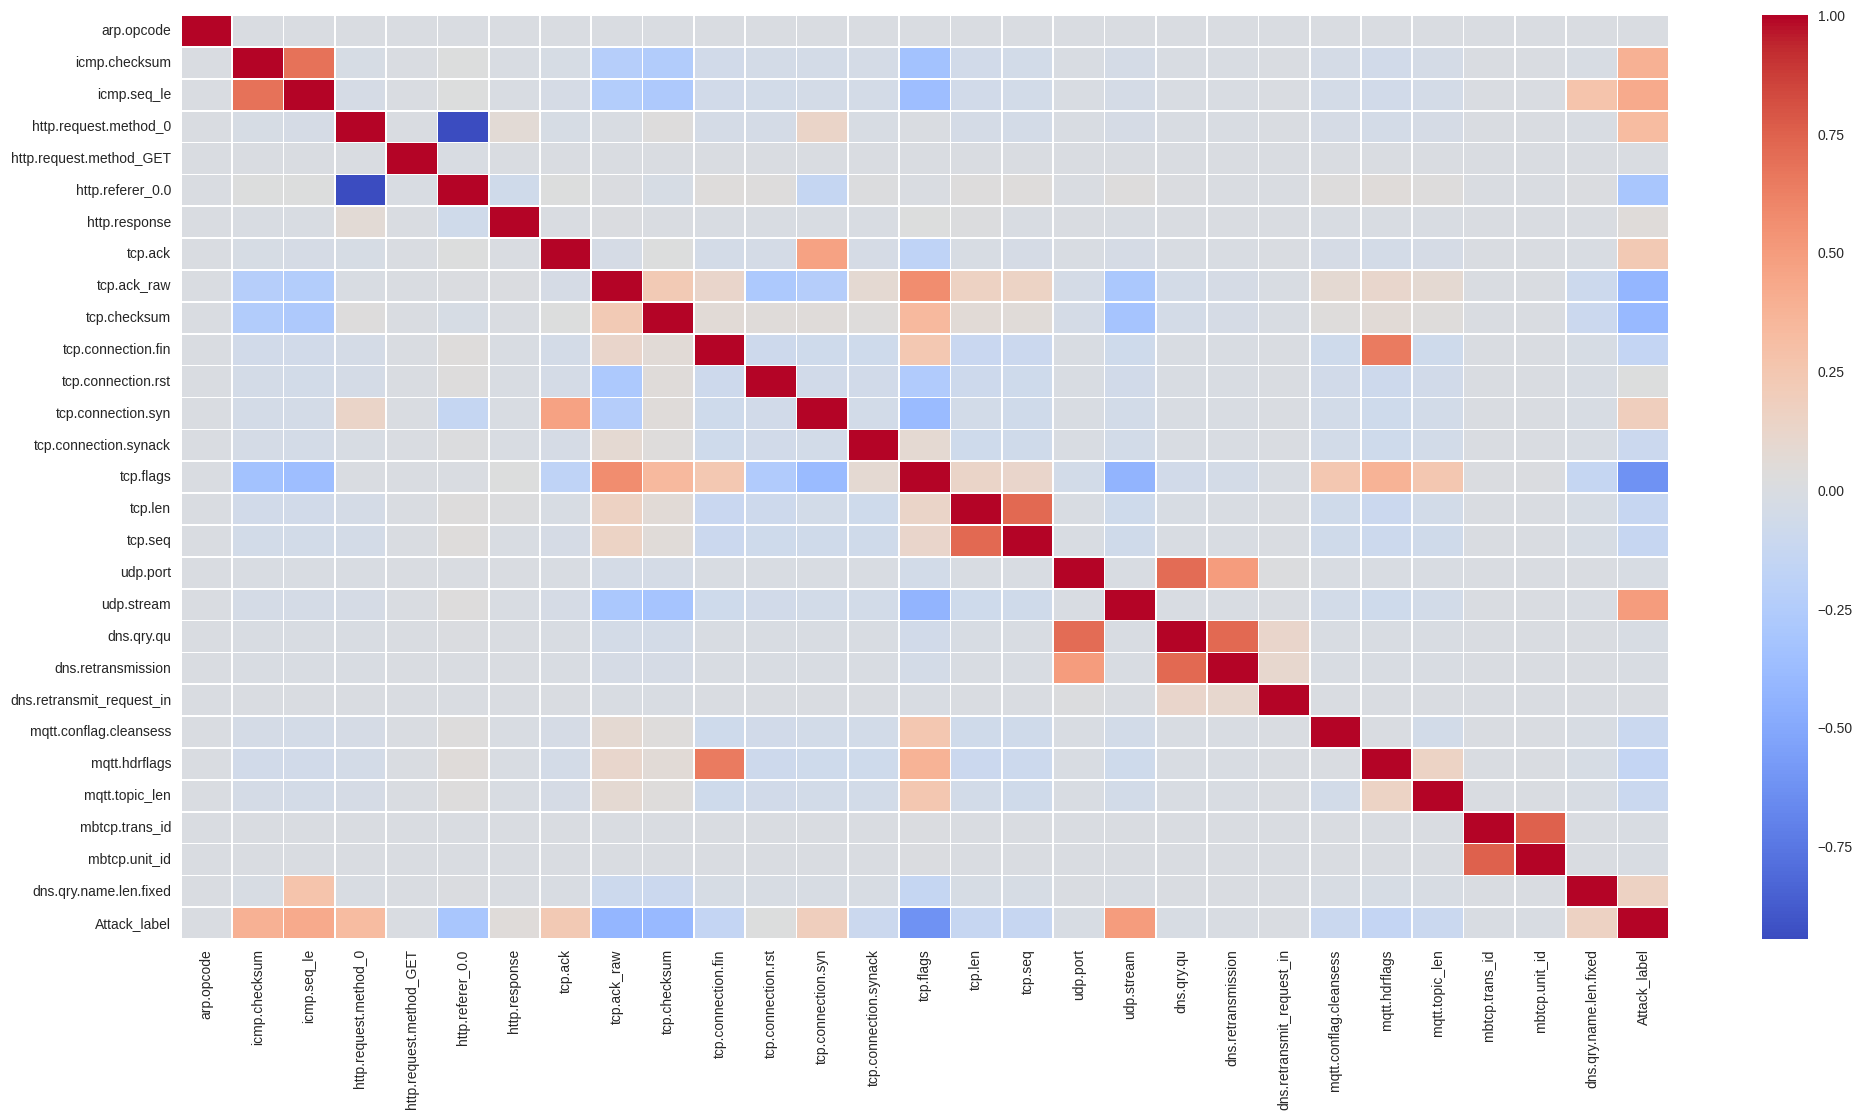

In [56]:
# plot correlation matrix of transformed dataset

plt.figure(figsize=(24,12))
sns.heatmap(data_transformed.corr(), annot=False, cmap='coolwarm', linewidth=0.5)
plt.show()

In [57]:
# show data processing pipeline

get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['arp.opcode', 'arp.hw.size',
                                             'icmp.checksum', 'icmp.seq_le',
                                             'icmp.transmit_timestamp',
                                             'http.content_length',
                                             'http.response', 'tcp.ack',
                                             'tcp.ack_raw', 'tcp.checksum',
                                             'tcp.connection.fin',
                                             'tcp.connection.rst',
                                             'tcp.connection.syn',
                                             'tcp.conn...
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

Step 6:

Save Training and Test Datasets

In [ ]:
# save transformed dataset to csv

data_transformed.to_csv('data-transformed.csv')

In [ ]:
# get this data and save to csv for Concrete FHE ML loading

X_train_transformed = get_config('X_train_transformed')
X_train_transformed.to_csv('X_train_transformed.csv')

In [ ]:
# get this data and save to csv for Concrete FHE ML loading

X_test_transformed = get_config('X_test_transformed')
X_test_transformed.to_csv('X_test_transformed.csv')

In [ ]:
# get this data and save to csv for Concrete FHE ML loading

y_train_transformed = get_config('y_train_transformed')
y_train_transformed.to_csv('y_train_transformed.csv')

In [ ]:
# get this data and save to csv for Concrete FHE ML loading

y_test_transformed = get_config('y_test_transformed')
y_test_transformed.to_csv('y_test_transformed.csv')

In [77]:
# create model and show performance

# try:
#     mlp_nn = create_model('mlp', cross_validation = False)
# except Exception as e:
#     print(e)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9945,0.9946,0.9685,0.9993,0.9837,0.9803,0.9805


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
mlp_nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3033, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

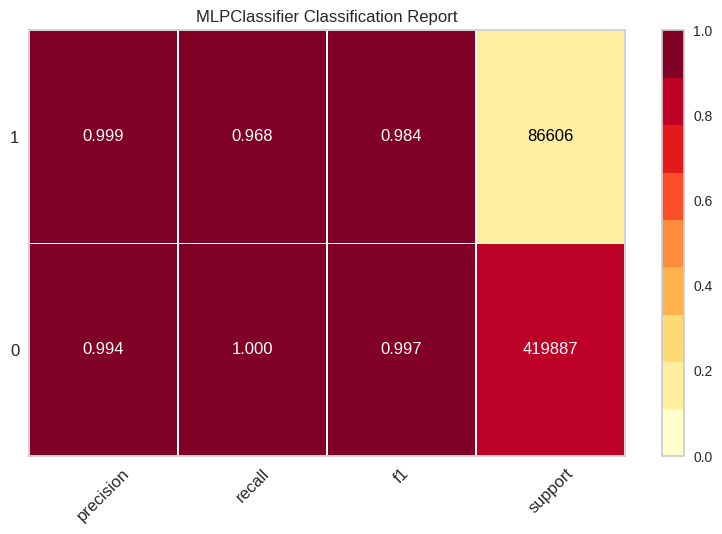

In [79]:
# plot classification report

# plot_model(mlp_nn, plot = 'class_report')

In [80]:
# save model to pkl file for reloading

# save_model(mlp_nn, 'mlp_nn_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['arp.opcode', 'arp.hw.size',
                                              'icmp.checksum', 'icmp.seq_le',
                                              'icmp.transmit_timestamp',
                                              'http.content_length',
                                              'http.response', 'tcp.ack',
                                              'tcp.ack_raw', 'tcp.checksum',
                                              'tcp.connection.fin',
                                              'tcp.connection.rst',
                                              'tcp.connection.syn',
                                              'tcp.conn...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
    

**Logistic Regression**

In [81]:
# create model and show performance

# try:
#     lr = create_model('lr', cross_validation = False)
# except Exception as e:
#     print(e)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9892,0.9903,0.9367,0.9999,0.9673,0.9608,0.9615


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3033, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

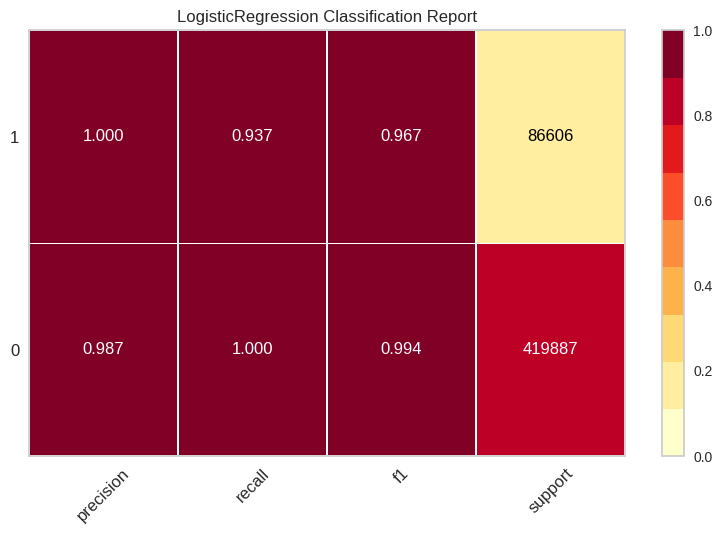

In [83]:
# plot classification report

# plot_model(lr, plot = 'class_report')

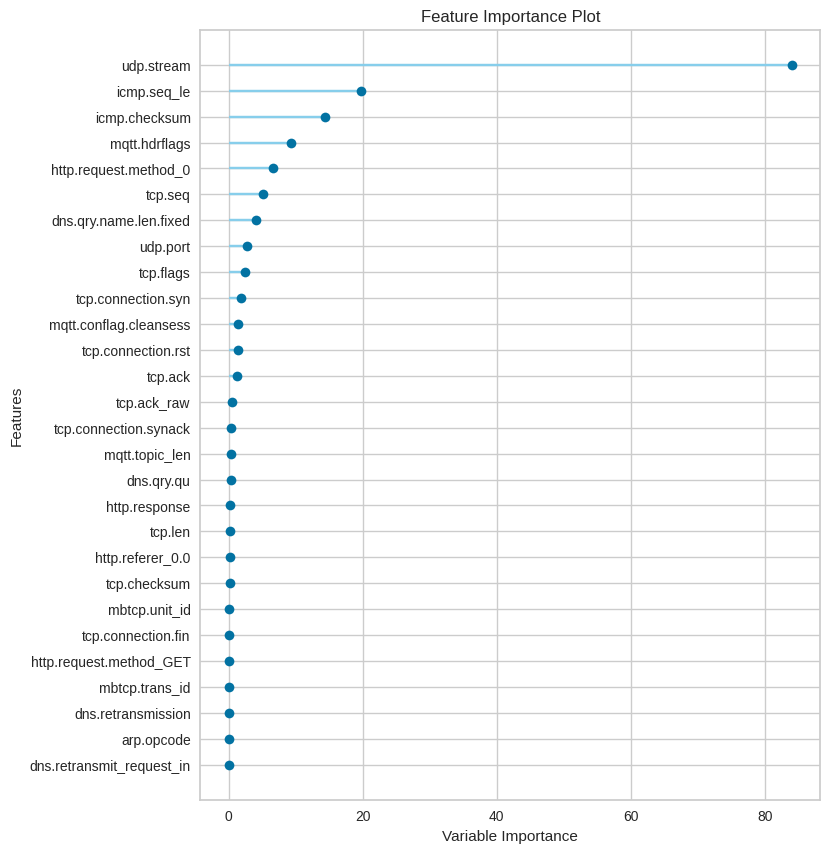

In [84]:
# plot importance of all features

# plot_model(lr, plot = 'feature_all')

In [85]:
# save model to pkl file for reloading

save_model(lr, 'lr_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['arp.opcode', 'arp.hw.size',
                                              'icmp.checksum', 'icmp.seq_le',
                                              'icmp.transmit_timestamp',
                                              'http.content_length',
                                              'http.response', 'tcp.ack',
                                              'tcp.ack_raw', 'tcp.checksum',
                                              'tcp.connection.fin',
                                              'tcp.connection.rst',
                                              'tcp.connection.syn',
                                              'tcp.conn...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\

**3.4.3 Optimize Parameters**

Create initial models for parameter tuning optimization

In [93]:
tune_model

<function pycaret.classification.functional.tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any>

In [108]:
# define search space
xgboost_params = {
            "n_estimators": [25,50,100,125,150],
             }
          
# tune model
tuned_xgboost_model, tuner = tune_model(
                                xgboost, 
                                custom_grid = xgboost_params, 
                                n_iter = 3, 
                                optimize = 'Recall', 
                                search_algorithm = 'random',
                                return_tuner=True
                                )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9978,0.9997,0.9871,0.9999,0.9935,0.9921,0.9922
1,0.9978,0.9997,0.9875,0.9999,0.9936,0.9923,0.9924
2,0.9977,0.9997,0.9868,0.9999,0.9933,0.9920,0.9920
Mean,0.9978,0.9997,0.9871,0.9999,0.9935,0.9922,0.9922
Std,0.0000,0.0000,0.0003,0.0000,0.0001,0.0001,0.0001


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [109]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['arp.opcode',
                                                                          'arp.hw.size',
                                                                          'icmp.checksum',
                                                                          'icmp.seq_le',
                                                                          'icmp.transmit_timestamp',
                                                                          'http.content_length',
                                                                          'http.response',
                                                                          'tc...
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None,
                                                            objective='binary:logistic',
                                                            predictor=None, ...))],
                                      verbose=False),
                   n_iter=3, n_jobs=1,
                   param_distributions={'actual_estimator__n_estimators': [25,
                                                                           50,
                                                                           100,
                                                                           125,
                                                                           150]},
                   pre_dispatch='2*n_jobs', random_state=3033, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(recall_score, average=weighted),
                   verbose=1)

In [99]:
tuned_xgboost_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [111]:
# define search space
random_forest_params = {
            "criterion": ["gini", "entropy"],
             }
          
# tune model
tuned_random_forest_model, tuner = tune_model(
                                random_forest, 
                                custom_grid = random_forest_params, 
                                n_iter = 1, 
                                optimize = 'Recall', 
                                search_algorithm = 'random',
                                return_tuner=True
                                )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.9947,0.9875,0.9887,0.9881,0.9856,0.9856
1,0.9960,0.9965,0.9879,0.9887,0.9883,0.9859,0.9859
2,0.9958,0.9953,0.9871,0.9884,0.9878,0.9853,0.9853
Mean,0.9959,0.9955,0.9875,0.9886,0.9880,0.9856,0.9856
Std,0.0001,0.0007,0.0003,0.0001,0.0002,0.0003,0.0003


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [112]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['arp.opcode',
                                                                          'arp.hw.size',
                                                                          'icmp.checksum',
                                                                          'icmp.seq_le',
                                                                          'icmp.transmit_timestamp',
                                                                          'http.content_length',
                                                                          'http.response',
                                                                          'tc...
                                                                     min_weight_fraction_leaf=0.0,
                                                                     n_estimators=100,
                                                                     n_jobs=-1,
                                                                     oob_score=False,
                                                                     random_state=3033,
                                                                     verbose=0,
                                                                     warm_start=False))],
                                      verbose=False),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'actual_estimator__criterion': ['gini',
                                                                        'entropy']},
                   pre_dispatch='2*n_jobs', random_state=3033, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(recall_score, average=weighted),
                   verbose=1)

In [113]:
# define search space
mlp_params = {
            "activation": ["tanh", "identity", "logistic", "relu"],
             }
          
# tune model
tuned_mlp_model, tuner = tune_model(
                                mlp_nn, 
                                custom_grid = mlp_params, 
                                n_iter = 1, 
                                optimize = 'Recall', 
                                search_algorithm = 'random',
                                return_tuner=True
                                )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9944,0.9946,0.9709,0.9963,0.9834,0.9801,0.9802
1,0.9942,0.9943,0.9695,0.9967,0.9829,0.9795,0.9796
2,0.9942,0.9944,0.9680,0.9979,0.9827,0.9792,0.9794
Mean,0.9943,0.9944,0.9695,0.9970,0.9830,0.9796,0.9797
Std,0.0001,0.0001,0.0012,0.0007,0.0003,0.0004,0.0003


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [114]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['arp.opcode',
                                                                          'arp.hw.size',
                                                                          'icmp.checksum',
                                                                          'icmp.seq_le',
                                                                          'icmp.transmit_timestamp',
                                                                          'http.content_length',
                                                                          'http.response',
                                                                          'tc...
                                                                   shuffle=True,
                                                                   solver='adam',
                                                                   tol=0.0001,
                                                                   validation_fraction=0.1,
                                                                   verbose=False,
                                                                   warm_start=False))],
                                      verbose=False),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'actual_estimator__activation': ['tanh',
                                                                         'identity',
                                                                         'logistic',
                                                                         'relu']},
                   pre_dispatch='2*n_jobs', random_state=3033, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(recall_score, average=weighted),
                   verbose=1)

In [115]:
tuned_mlp_model

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3033, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)